In [3]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.compat.v1 import ragged  # Import the compat.v1 module for RaggedTensorValue
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
from tensorflow.compat.v1 import ragged  # Import the compat.v1 module for RaggedTensorValue
import matplotlib.pyplot as plt

In [5]:

#Dataset directories
train_dir = 'data/train'
val_dir = 'data/test'

#Image Datagenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(48, 48),
  batch_size=64,
  color_mode='grayscale',
  class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
  val_dir,
  target_size=(48, 48),
  batch_size=64,
  color_mode='grayscale',
  class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
# CNN Model
model=tf.keras.models.Sequential([
    #Ideal inputshape
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Prevent overfitting
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    #Layers with 1024 neurons
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    #Dense with posible classes
    tf.keras.layers.Dense(7, activation='softmax')
])

In [10]:
# Function to display training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [11]:
#Compile, fit and save model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
    verbose = 1
)
# Save the trained model weights
model.save_weights("test.h5")

Epoch 1/30
449/449 [==============================] - 1859s 4s/step - loss: 1.7055 - accuracy: 0.3114 - val_loss: 1.5044 - val_accuracy: 0.4157
Epoch 2/30
449/449 [==============================] - 1232s 3s/step - loss: 1.4427 - accuracy: 0.4423 - val_loss: 1.3325 - val_accuracy: 0.4901
Epoch 3/30
449/449 [==============================] - 1096s 2s/step - loss: 1.3050 - accuracy: 0.5004 - val_loss: 1.2397 - val_accuracy: 0.5276
Epoch 4/30
449/449 [==============================] - 1003s 2s/step - loss: 1.2349 - accuracy: 0.5292 - val_loss: 1.1820 - val_accuracy: 0.5490
Epoch 5/30
449/449 [==============================] - 1011s 2s/step - loss: 1.1743 - accuracy: 0.5501 - val_loss: 1.1506 - val_accuracy: 0.5667
Epoch 6/30
449/449 [==============================] - 1008s 2s/step - loss: 1.1286 - accuracy: 0.5698 - val_loss: 1.1349 - val_accuracy: 0.5772
Epoch 7/30
449/449 [==============================] - 994s 2s/step - loss: 1.0886 - accuracy: 0.5882 - val_loss: 1.1089 - val_accuracy: 

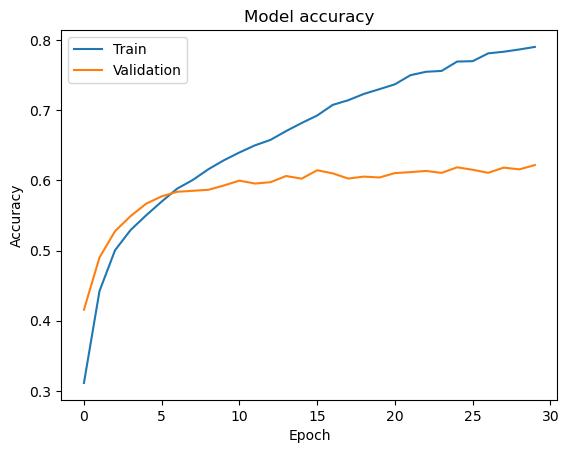

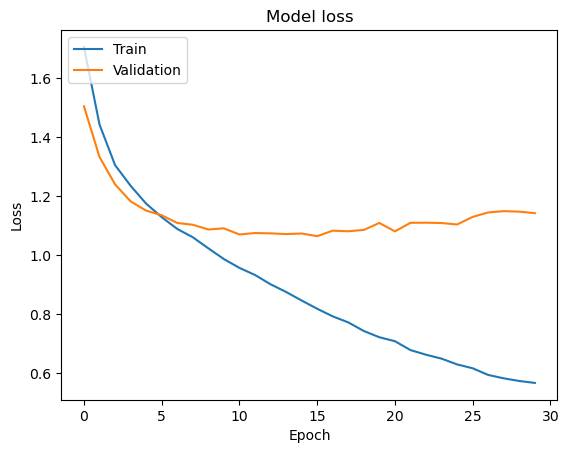

In [12]:
# Display the training history
plot_training_history(history)